In [128]:
import keras
import os
import cv2 as cv2
from params import get_params
from sklearn import preprocessing
import numpy as np
from os import walk
import matplotlib.pyplot as plt
from build_database import build_database

from keras.models import Model
from keras.preprocessing import image
from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input

In [129]:
base_model = VGG19(weights='imagenet') # media de carga de 40s para VGG19 y media de carga de 145s para resnet50

In [130]:
model = Model(inputs=base_model.input, outputs=base_model.get_layer('fc2').output)

In [131]:
params = get_params() # se queda la información de los directorios

In [132]:
params['split'] = 'val'
readfile = os.path.join(params['root'],params['root_save'], params['image_lists'],params['split'] + '.txt')  #Coje el txt del val y lo lee

In [133]:
with open(readfile,'r') as f:
        image_list = f.readlines()
        
# image_list almacena todos los nombres de las variables

In [134]:
lista = []
for image_name in image_list:

        # Read image
        lista.append(os.path.join(params['root'],params['database'],
                                     params['split'],
                                     'images',image_name.rstrip()))

In [135]:
i=0
imagen = []
final = []
for i in range(len(image_list)):   
    imagen.append(image.load_img(lista[i], target_size=(224, 224)))# Aquí se efectua la lectura de todas las imagenes
    final.append(image.img_to_array(imagen[i]))
    final[i] = np.expand_dims(final[i], axis=0)
    final[i] = preprocess_input(final[i])

In [136]:
salida = []
k = 0
for k in range(len(image_list)):
    salida = model.predict(final[k])


In [137]:
#ahora llenamos test

In [138]:
params['splitt'] = 'test'
readfile2 = os.path.join(params['root'],params['root_save'], params['image_lists'],params['splitt'] + '.txt') 

In [139]:
with open(readfile2,'r') as f2:
    image_list2 = f2.readlines()

In [140]:
lista2 = []
for image_name2 in image_list2:
    lista2.append(os.path.join(params['root'],params['database'],
                                     params['splitt'],
                                     'images',image_name2.rstrip()))

In [141]:
i2=0
imagen2 = []
final2 = []
for i2 in range(len(image_list2)):   
    imagen2.append(image.load_img(lista2[i2], target_size=(224, 224)))# Aquí se efectua la lectura de todas las imagenes
    final2.append(image.img_to_array(imagen2[i2]))
    final2[i2] = np.expand_dims(final2[i2], axis=0)
    final2[i2] = preprocess_input(final2[i2])

In [142]:
salida2 = []
k2 = 0
for k2 in range(len(image_list2)):
    salida2 = model.predict(final2[k2])


In [143]:
#ahora llenamos train 

In [144]:
params['splittr'] = 'train'
readfile3 = os.path.join(params['root'],params['root_save'], params['image_lists'],params['splittr'] + '.txt') 

In [145]:
with open(readfile3,'r') as f3:
    image_list3 = f3.readlines()

In [146]:
lista3 = []
for image_name3 in image_list3:
    lista3.append(os.path.join(params['root'],params['database'],
                                     params['splittr'],
                                     'images',image_name3.rstrip()))

In [147]:
i3=0
imagen3 = []
final3 = []
for i3 in range(len(image_list3)):   
    imagen3.append(image.load_img(lista3[i3], target_size=(224, 224)))# Aquí se efectua la lectura de todas las imagenes
    final3.append(image.img_to_array(imagen3[i3]))
    
    final3[i3] = np.expand_dims(final3[i3], axis=0)
    final3[i3] = preprocess_input(final3[i3])
    

In [148]:
salida3 = []
k3 = 0
for k3 in range(len(image_list3)):
    salida3 = model.predict(final3[k3])

In [153]:
salida.shape

(1, 4096)

In [154]:
salida2.shape
 

(1, 4096)

In [155]:
salida3.shape

(1, 4096)

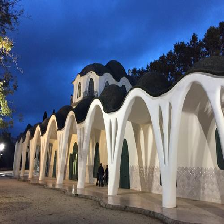

In [156]:
imagen[1]

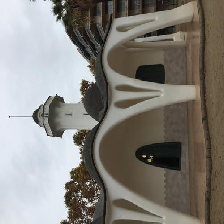

In [157]:
imagen2[1]

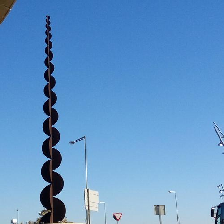

In [158]:
imagen3[1]